In [1]:
import pandas as pd
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

In [2]:
# Read in the data
data = pd.read_csv("finalstats.csv")

# shuffle the rows
data = data.sample(axis=0, frac=1.0)

In [3]:
# our targets
y = data["PTS"].values

# build the feature matrix
X = data.drop(data.columns[0], axis=1)
X[np.isnan(X)] = np.nanmean(X)

# set the train and test values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

# Normalize the input data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [1000, 2000],
}

grid_search = GridSearchCV(rf_clf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
rf_clf_best = RandomForestClassifier(random_state=42, **best_params)
rf_clf_best.fit(X_train, y_train)
y_pred = rf_clf_best.predict(X_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
mse = mean_squared_error(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Best hyperparameters:', grid_search.best_params_)
print("MSE: ", math.sqrt(mse))
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)

/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy: 0.31597633136094677
Best hyperparameters: {'n_estimators': 2000}
MSE:  5.49954274591999
Precision: 0.29959455056184114
Recall: 0.31597633136094677
F1 score: 0.2948197287579077


/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pub/eb/apps/all/DavidsonJupyter/2021-common-GCCcore-10.2.0/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


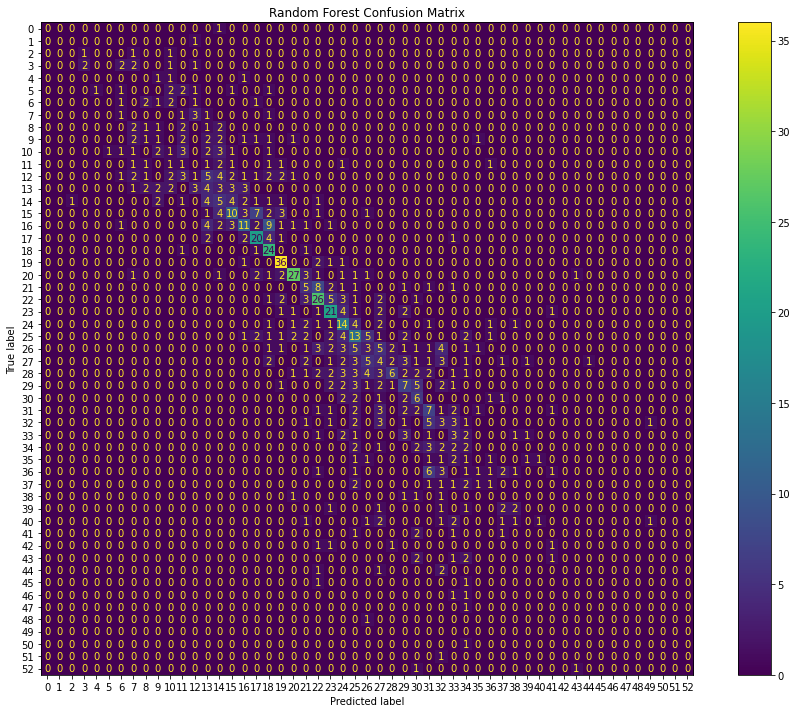

/tmp/ipykernel_3106712/3737296228.py:8: RuntimeWarning: invalid value encountered in divide
  cm.diagonal()/cm.sum(axis=1)


array([0.        , 0.        , 0.        , 0.25      , 0.        ,
       0.        , 0.125     , 0.        , 0.11111111, 0.06666667,
       0.0625    , 0.08333333, 0.03571429, 0.17391304, 0.2173913 ,
       0.3125    , 0.30555556, 0.66666667, 0.88888889, 0.87804878,
       0.64285714, 0.25      , 0.59090909, 0.61764706, 0.48275862,
       0.33333333, 0.08571429, 0.12121212, 0.18181818, 0.25925926,
       0.4       , 0.30434783, 0.14285714, 0.2       , 0.14285714,
       0.        , 0.05555556, 0.        , 0.        , 0.        ,
       0.09090909, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ,        nan,
       0.        , 0.        , 0.        ])

In [9]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(16, 12))
disp.plot(ax=ax)
plt.savefig('cm_rf.png', dpi=300)
plt.title('Random Forest Confusion Matrix')
plt.show()
cm.diagonal()/cm.sum(axis=1)

[ 13   9  10  17  27  36  34  36  70 267  79  50  31  29  26  19  11   9
   5   5  10]


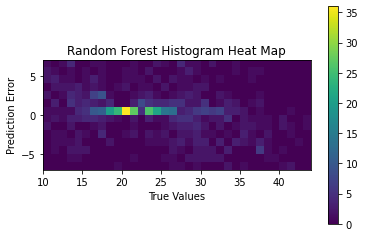

In [6]:
diff = y_pred - y_test

bins = np.arange(-9, 13)
hist, _ = np.histogram(diff, bins=bins)
print(hist)

# Create a 2D histogram (heatmap) of the differences
hist, xedges, yedges = np.histogram2d(y_test, diff, bins=(np.arange(10, 45), np.arange(-7, 8)))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(hist.T, extent=extent, origin='lower')
plt.colorbar()
plt.xlabel('True Values')
plt.ylabel('Prediction Error')
plt.savefig('heatmap_rf.png', dpi=300)
plt.title('Random Forest Histogram Heat Map')
plt.show()

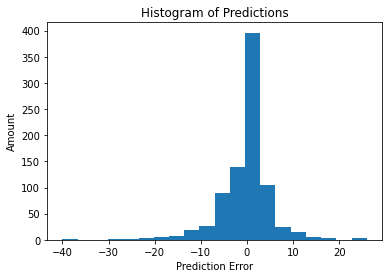

In [7]:
plt.hist(diff, bins=20)

# Add labels and title
plt.xlabel("Prediction Error")
plt.ylabel("Amount")
plt.savefig('hist_rf.png', dpi=300)
plt.title("Histogram of Predictions")

# Show the plot
plt.show()